### PHYS 249 Lab 3: Comparing Integration Methods

(See Newman Example 5.1) 

Consider the function 

$$f(x) = x^4 - 2x + 1$$

This has the "analytic" antiderivative $F(x) = \frac{1}{5}x^5 - x^2 + x + C$, so integrating from $x = 0$ to $x = 2$, we should get 

$$\int_0^2 f(x) dx = \left[F(x)\right]_0^2 = 2^5/5 - 2^2 + 2 = 32/5 - 4 + 2 = 4.4$$

So let's first try to calculate this integral using different techniques, and compare our results to the analytic answer, since it is known in this case.

First, however, let's check what the integrand looks like.

### 3.1) Plot the Integral

Plot the integrand from 0 to 2. Examine the plot and check how the function behaves at the ends of the interval.



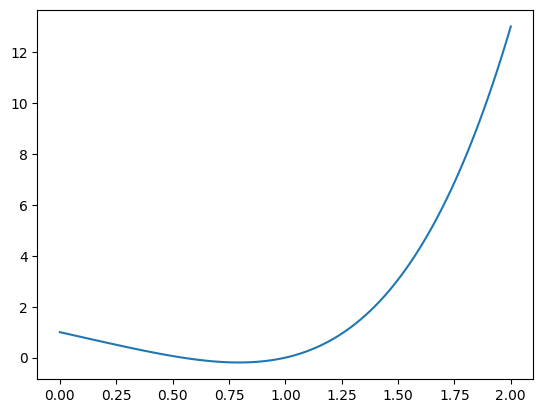

In [66]:
from matplotlib import pyplot as plt
from numpy import array, linspace


integrand = lambda x : x*x*x*x - 2*x + 1
x = linspace(0, 2, 100)
y = integrand(x)

plt.plot(x, y)
plt.show()

### 3.2) Integrate using a Riemann sum

Now we can start by calculating the integral using a Riemann sum. Remember this means defining a set of $N$ intervals, getting the midpoints of these intervals, evaluating the function at each midpoint, summing the evaluations, and multiplying by the interval divided by $N$ (or equivalently dividing by the stepsize).

Once you code is working, have it print out the **error** $E$. This is the difference between the estimate for a given $N$, which we will call $I(N)$, and the true value $I_{\rm true} = 4.4$; so $E = I(N) - I_{\rm true}$.

Also print out the **relative error**, which is $E/I_{\rm true} = (I(N) - I_{\rm true})/I_{\rm true}$. 

(Note the error and relative error can be positive or negative, but we usually just care about its absolute value.)

In [67]:
def reimman(n, a, b, fun):

    sum = 0
    deltax = (b-a)/n
    

    i = a + deltax/2
    while i < b:
        sum += fun(i)
        i+= deltax

    sum*=deltax

    return sum

def error(true, n, a, b, fun, method):
    return abs(true - method(n, a, b, fun))/true


print(reimman(100, 0, 2, integrand))
print(error(4.4, 100, 0, 2, integrand, reimman))


4.399466676000014
0.0001212099999969851


### 3.3) Integrate using the trapezoid rule

Now try calculating the integral using the trapezoid rule. Remember this means defining a set of $N$ intervals, getting the **end points** of these intervals, and evaluating the function there before summing and multiplying by the stepsize, with each endpoint being weighted by 1, except the first and last, which are weighted by $1/2$.

In [68]:
def trap(n, a, b, fun):
    sum = 0
    deltax = (b-a)/n



    for i in range(1, n):
        # print(a + i*deltax)
        sum += fun(a + i*deltax)

    sum += 0.5*(fun(a) + fun(b))
    sum*= deltax
    return sum

# trap(100, 0, 2, integrand)
trap(10, 0.0, 2.0, integrand)
# error(4.4, 100, 0, 2, integrand, trap)


4.506560000000001

### 3.4) Integrate using Simpson's rule

Now try calculating the integral using the Simpson's rule. Remember this means defining a set of $N$ intervals, getting the **end points** of these intervals, and evaluating the function there before summing and multiplying by the stepsize, but now endpoints are alternately weighted by 4/3 and 2/3, except the first and last, which are weighted by $1/3$. 

Also note that in this case, $N$ must be **even**.

In [69]:
def simp(n, a, b, fun):
    deltax = (b-a)/n
    sum = 0
    evensum = 0
    oddsum = 0
    for i in range(1, n, 2):
        evensum += fun(a + i*deltax)

    evensum*=4
    for i in range(2, n, 2):
        oddsum += fun(a + i*deltax)
    oddsum *= 2
    sum+= evensum + oddsum + fun(a) + fun(b)
    sum *= (1/3)*deltax

    return sum


simp(100, 0, 2, integrand)
# error(4.4, 100, 0, 2, integrand, simp)

4.400000042666667

### 3.5) Compare errors

Given these three methods, record the relative for each method for $N = 10, 30, 100, 300, 1000$. (You can rerun things by hand, and cut and paste the printouts into a new text cell below, or you can write a loop and wrap it around the code. **If you get error messages about overflows, just ignore them.** Alternately, the cell below shows you how to rewrite a method as a user-defined function and call it.)

Once you have the 5 values of the relative error for each of the 3 methods, take their absolute values, then the $\log_{10}$ of the absolute values, and plot these versus the $\log_{10}$ of $N$. What do you conlude about the relative convergence of the three methods. (Note the convergence may be slightly different for different functions; you can try changing the original function to test this if you like.)


In [70]:
# #Riemann version

# from matplotlib.pyplot import plot, show
# from numpy import log10, array
# from math import pi
# from numpy import arange, exp

# def R_int(ll,rl,N,f):
#     h = (rl-ll)/N
#     mx = arange(ll+(h/2),rl,h)
#     my = f(mx)
#     dI = h*my
#     I = sum(dI)
#     return(I)

# true_val = 4.4

# N1l = []
# E1l = []

# Nvals = [10,30,100,300,1000]
# for N in Nvals:
#     N1l.append(N)
#     Iv = R_int(0.0,2.0,N,f_of_z)
#     E1l.append((Iv - true_val)/true_val)
    
# lN1 = log10(array(N1l))
# lE1l = log10(abs(array(E1l)))
# plot(lN1,lE1l,"ro")
# show()
# print(E1l)

4.506560000000001
4.411850534979425
4.401066656
4.400118518386834
4.4000106666656


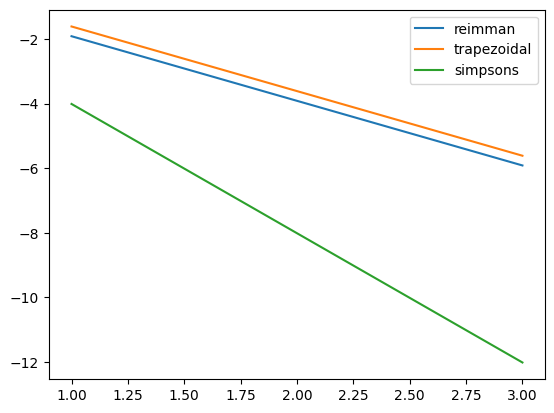

In [71]:
from numpy import log10
ns = array([10, 30, 100, 300, 1000])
reimm_errors = array([error(4.4, ns[i], 0, 2, integrand, reimman) for i in range(5)])
trap_errors = array([error(4.4, ns[i], 0, 2, integrand, trap) for i in range(5)])
simp_errors = array([error(4.4, ns[i], 0, 2, integrand, simp) for i in range(5)])

for n in ns:
    print(trap(n, 0, 2, integrand))


plt.plot(log10(ns), log10(reimm_errors),  label="reimman")
plt.plot(log10(ns), log10(trap_errors),  label="trapezoidal")
plt.plot(log10(ns), log10(simp_errors),  label="simpsons")
plt.legend()
plt.show()


